In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans



In [5]:
data = load_wine(as_frame=True)

In [6]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])

In [100]:
df.shape

(178, 14)

In [30]:
#Features: 0 - alcohol, 1 - malic_acid, 2 - ash
features = df[['alcohol', 'malic_acid', 'ash']]
features



,alcohol,malic_acid,ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


In [129]:
features.iloc[:,0]

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [33]:
#Split data
X = features
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [119]:
def ConfusionMatrix(cm, labels=['alcohol','malic_acid', 'ash']):
    df = pd.DataFrame(data=cm, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    return df

In [120]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
df = ConfusionMatrix(cm)


In [101]:
#tSNE
train = df[0:178]
labels = train.pop("target")
train = np.asarray(train)
labels = np.asarray(labels)


In [102]:
pca = PCA(n_components=10)
train = pca.fit_transform(train)

In [103]:
tsne = TSNE(n_components = 2, random_state=0, perplexity = 2)
tsne_res = tsne.fit_transform(train)

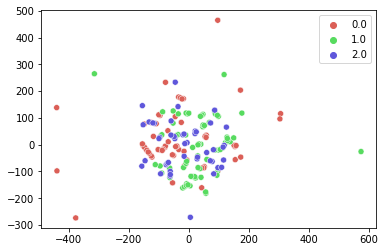

In [104]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = labels, palette = sns.hls_palette(3), legend = 'full')
plt.show()

In [137]:
model = KMeans(n_clusters=3)
model.fit(x_test, y_test)
y_pred = model.predict(x_train)


array([2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1], dtype=int32)

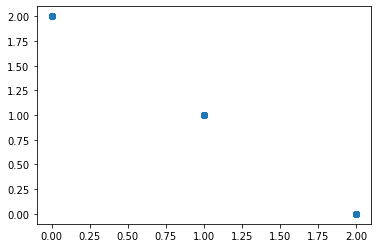

In [142]:
plt.scatter(y_pred, labels)
plt.show()